### Fine-tuning

    - Fine-tuning consists in unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model (in our case, the fully-connected classifier) and these top layers. This is called "fine-tuning" because it slightly adjusts the more abstract representations of the model being reused, in order to make them more relevant for the problem at hand.



    - unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model
    
    
    + fine-tune the top layers of the convolutional base once the classifier on top has already been trained. If the classifier isn’t already trained, then the error signal propagating through the network during training will be too large, and the representations previously learned by the layers being fine-tuned will be destroyed. Thus the steps for fine-tuning a network are as follow:
1. Add your custom network on top of an already-trained base network.
2. Freeze the base network.
3. Train the part you added.
4. Unfreeze some layers in the base network.
5. Jointly train both these layers and the part you added.

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Section 1

In [4]:
from keras.applications import VGG16

In [5]:
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

In [6]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [7]:
# traverse n/w layer by layer, set all but last 3 as False 

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
import os
base_dir = 'D:/Datasets/cats_and_dogs_small_1/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [18]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=70,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
69/70 [============================>.] - ETA: 8s - loss: 0.1368 - acc: 0.9464 

c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


70/70 [==============================] - 972s 14s/step - loss: 0.1361 - acc: 0.9464 - val_loss: 0.2027 - val_acc: 0.9210
Epoch 2/10
59/70 [========================>.....] - ETA: 1:37 - loss: 0.1484 - acc: 0.9415

c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping 

70/70 [==============================] - 986s 14s/step - loss: 0.1433 - acc: 0.9436 - val_loss: 0.2227 - val_acc: 0.9040
Epoch 3/10
 4/70 [>.............................] - ETA: 9:14 - loss: 0.1425 - acc: 0.9500

c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping 

70/70 [==============================] - 952s 14s/step - loss: 0.1533 - acc: 0.9407 - val_loss: 0.2060 - val_acc: 0.9120
Epoch 4/10
70/70 [==============================] - 953s 14s/step - loss: 0.0975 - acc: 0.9664 - val_loss: 0.1867 - val_acc: 0.9240
Epoch 5/10
70/70 [==============================] - 950s 14s/step - loss: 0.0911 - acc: 0.9664 - val_loss: 0.1872 - val_acc: 0.9180
Epoch 6/10
70/70 [==============================] - 950s 14s/step - loss: 0.0765 - acc: 0.9714 - val_loss: 0.1763 - val_acc: 0.9180
Epoch 7/10
70/70 [==============================] - 962s 14s/step - loss: 0.0646 - acc: 0.9771 - val_loss: 0.2142 - val_acc: 0.9140
Epoch 8/10
70/70 [==============================] - 956s 14s/step - loss: 0.0640 - acc: 0.9786 - val_loss: 0.1357 - val_acc: 0.9370
Epoch 9/10
70/70 [==============================] - 1083s 15s/step - loss: 0.0450 - acc: 0.9871 - val_loss: 0.1780 - val_acc: 0.9410
Epoch 10/10
70/70 [==============================] - 1100s 16s/step - loss: 0.0350 - a

In [19]:
model.save('cats_and_dogs_small_6.h5')

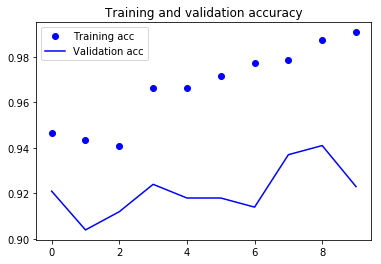

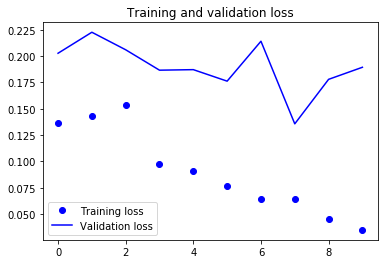

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()